In [104]:
import pickle
from matplotlib import pyplot as plt

In [105]:
filename = 'Exclamation Mark Dataset__Random Forest__Exclamation Mark Dataset Family__AbsoluteValues__20250529_134349.pkl'
model = "SVM" if "SVM" in filename else ("Neural Network" if "Neural Network" in filename else ("Logistic Regression" if "Logistic Regression" in filename else ("Random Forest" if "Random Forest" in filename else "Unknown")))
dataset = "gummy_worm_family" if "Gummy Worm" in filename else "exclamation_mark_family"

In [106]:
with (open(f'./data/{filename}', 'rb') as file):
    results = pickle.load(file)

In [107]:
bins = results["Binss"]
means = results["Means"]
std_devs = results["Std Devs"]

   Plotting...


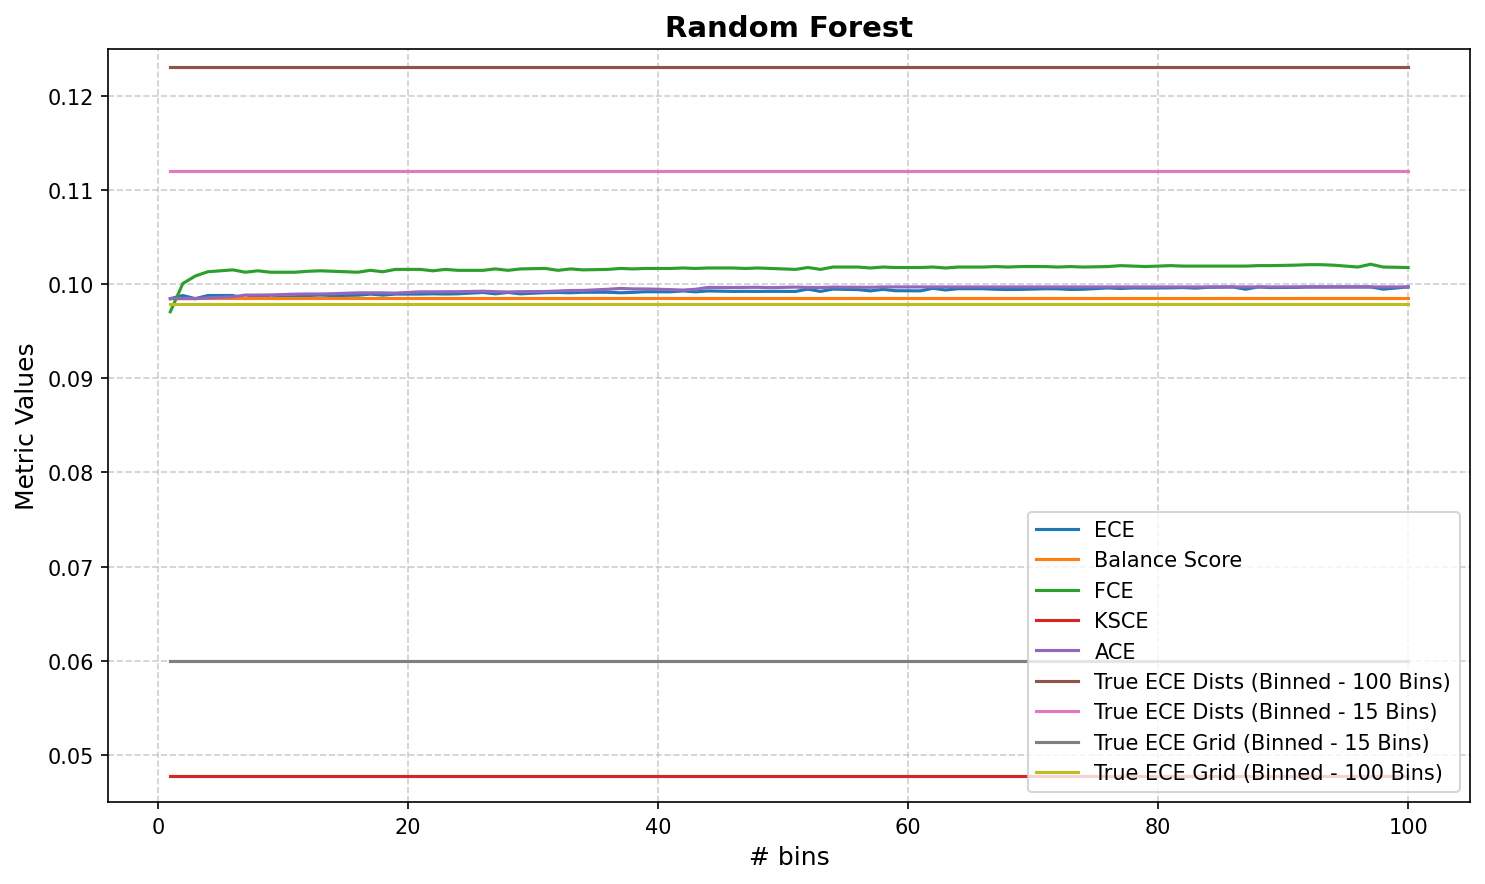

In [111]:
# Plotting Mean and Std Deviation #
print("   Plotting...")
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

for metric in means.keys():
    if metric != "TCE" and metric != "Accuracy" and metric != "True ECE Grid (Binned - 15 Bins)" and metric != "True ECE Grid (Binned - 100 Bins)":
        ax.plot(bins, means[metric], label=metric)
        #if metric != "True ECE Dists (Binned - 15 Bins)" and metric != "True ECE Dists (Binned - 100 Bins)":
            #ax.fill_between(subsample_sizes, np.array(means[metric]) - np.array(std_devs[metric]),
                       #np.array(means[metric]) + np.array(std_devs[metric]), alpha=0.2)

ax.plot(bins, means["True ECE Grid (Binned - 15 Bins)"], label="True ECE Grid (Binned - 15 Bins)")
ax.plot(bins, means["True ECE Grid (Binned - 100 Bins)"], label="True ECE Grid (Binned - 100 Bins)")
#ax.plot(bins, means["TCE"], label="TCE")

plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.25)
plt.xlabel('# bins', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.title(model, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.legend()
plt.ylim(0.045, 0.125)
ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig(f'./plots/{model}_{dataset}_zoomed.png')